# ***¿Qué vamos a hacer?***

*El objeto de este proyecto es resolver un problema de regresión o de clasificación utilizando
como origen de datos los datos obtenidos de un reloj deportivo durante los entrenamientos y competiciones realizadas.*
*El fichero con los datos está adjunto a la actividad y se denomina Activities.csv*

*Para el problema de regresión se ha de predecir el número de Calorías*

*Nuestro Dataset consiste en el conjunto de datos de las carreras que nuestro compañero Pablo realiza diariamente desde hace un tiempo con una App de su Smartwach, en el que se recojen múltiples datos referentes a sus tiempos en carrera, distancia recorrida, frecuencia cardíaca, entre otros que veremos a continuación.*

*Principalmente nos centraremos en utilizar estas tablas específicas:*

· **Tipo de actividad**: Si se trata de una Carrera o un Running Trial

· **Distanciad**: La distancia total recorrido en Km

· **Calorías**: Cantidad quemada de Calorías durante la actividad

· **Tiempo**: Cuanto se ha tardado en realizar la actividad

· **Frecuencia Cardíaca Media**: Valor medio de la frecuencia cardíaca al correr

· **TE Aeróbico**: Determina el esfuerzo aeróbico realizado en la actividad

· **Cadencia de Carera Media**: La Media de velocidades durante la actividad

· **Ritmo Medio**: La Media del ritmo de la actividad

· **Ascenso Total**: La altura ascendida durante la actividad

· **Descenso Total**: La altura descendida durante la actividad

· **Temperatura Mínima**: La temperatura mínima ambiental durante la actividad

· **Temperatura Máxima**: La temperatura máxima ambiental durante la actividad

· **Altura Mínima**: Valores relacionados con la altura que se puede alcanzar con la actividad

· **Altura Máxima**: Valores relacionados con la altura que se puede alcanzar con la actividad

# ***Carga del Dataset y Primeras Impresiones***

In [ ]:
# Carga de datos
import pandas as pd
from google.colab import drive
# Manipulación y visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from google.colab import drive
drive.mount('/content/drive')

In [2]:
url = "/content/drive/My Drive/Curso IA_BigData/Colab Notebooks/Salvador - Sistemas de IA/Actividades/Trabajo Extra - Activities/Activities.csv"
datos = pd.read_csv(url,sep=';')
datos.head()

,Tipo de actividad,Fecha,Favorito,Título,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,Frecuencia cardiaca máxima,TE aeróbico,...,Temperatura mínima,Intervalo en superficie,Descompresión,Mejor tiempo de vuelta,Número de vueltas,Temperatura máxima,Tiempo en movimiento,Tiempo transcurrido,Altura mínima,Altura máxima
0,Trail running,14/01/2023 8:21,False,Santa Brígida Trail running,21.48,"1,802",2:40:36,147,172,3.2,...,19.0,0:00,No,02:40:35.89.9,1,26.0,2:37:14,2:47:06,372,837.0
1,Carrera,10/01/2023 8:36,False,Santa Brígida - Series 20x12x15,8.46,673,0:47:09,156,178,3.3,...,20.0,0:00,No,00:08.55.3,15,28.0,0:47:05,0:48:18,474,522.0
2,Trail running,09/01/2023 8:20,False,Santa Brígida Trail running,11.11,"1,044",1:08:56,160,188,4.0,...,19.0,0:00,No,01:08:55.66,1,28.0,1:08:43,1:08:56,366,553.0
3,Trail running,07/01/2023 16:59,False,Santa Brígida Trail running,8.02,810,1:03:47,149,175,3.1,...,20.0,0:00,No,01:03:46.71.1,1,27.0,1:02:40,1:03:47,544,790.0
4,Trail running,04/01/2023 16:54,False,Santa Brígida Trail running,12.08,"1,007",1:28:49,144,158,2.6,...,20.0,0:00,No,01:28:49.19.4,1,26.0,1:28:17,1:28:49,414,531.0


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tipo de actividad                      158 non-null    object 
 1   Fecha                                  158 non-null    object 
 2   Favorito                               158 non-null    bool   
 3   Título                                 158 non-null    object 
 4   Distancia                              158 non-null    float64
 5   Calorías                               158 non-null    object 
 6   Tiempo                                 158 non-null    object 
 7   Frecuencia cardiaca media              158 non-null    int64  
 8   Frecuencia cardiaca máxima             158 non-null    int64  
 9   TE aeróbico                            158 non-null    object 
 10  Cadencia de carrera media              158 non-null    int64  
 11  Cadenc

***PRIMERA MATRIZ DE CORRELACIÓN DE DATOS***

Nos servirá para comprobar cuales son los datos más relevantes y útiles para nuestro problema.

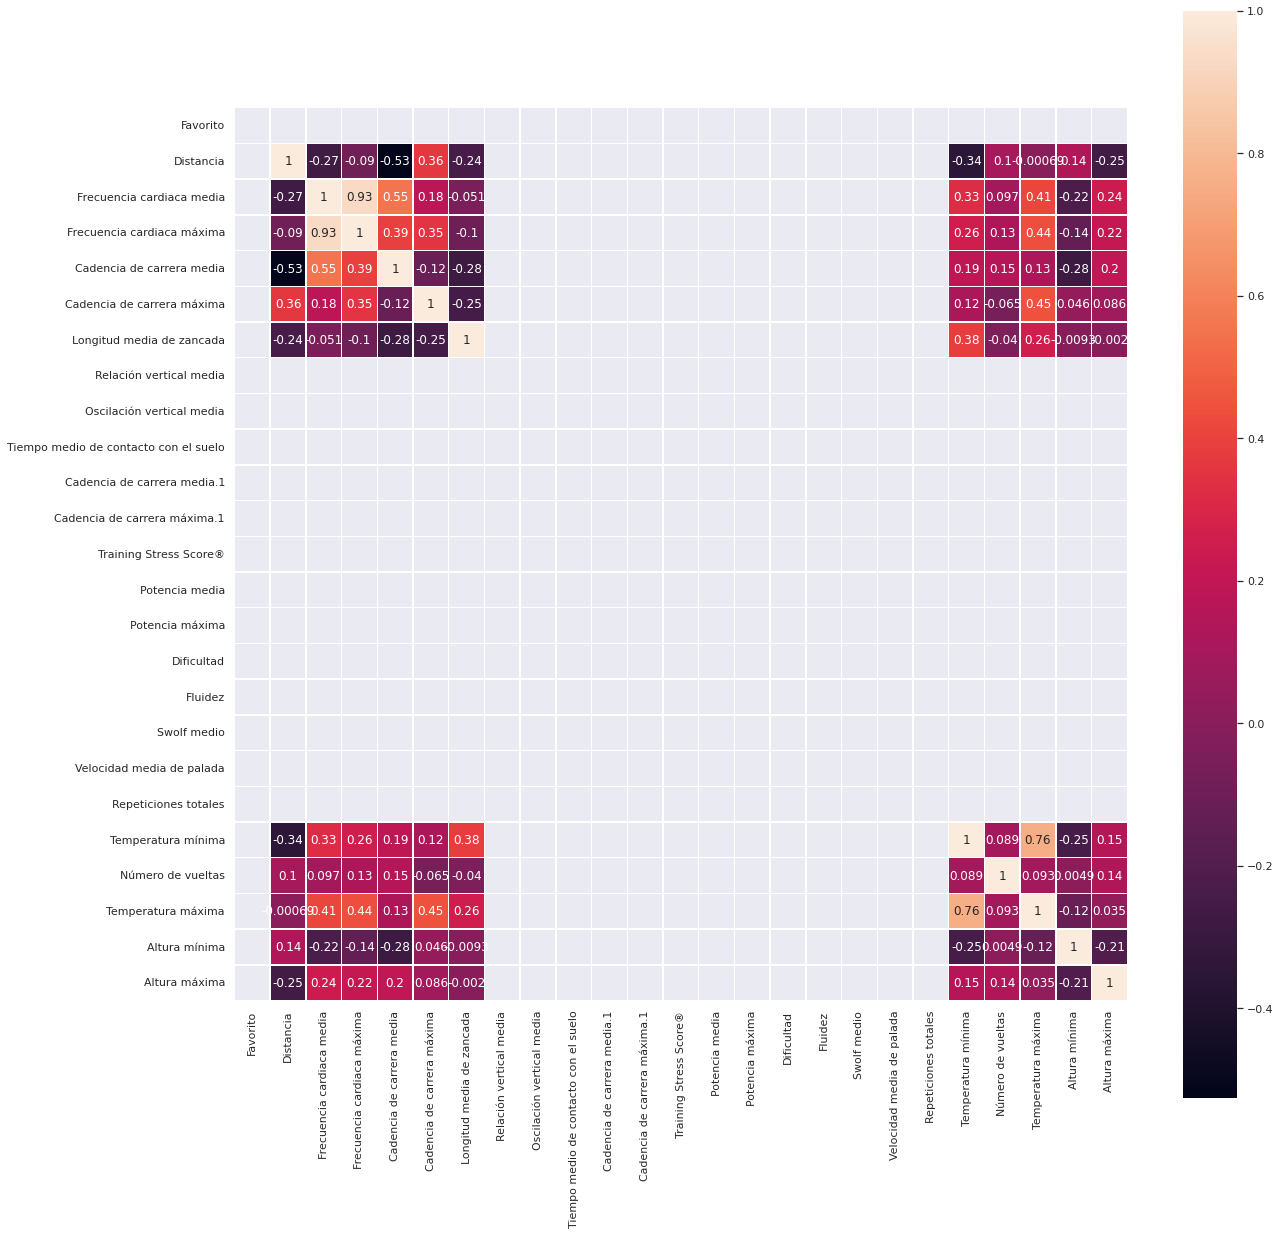

In [4]:
# Se utiliza la librería Seaborn descargada más arriba
sns.set()
fig, ax = plt.subplots(figsize=(20,20))  # Manipular el tamaño del Mapa
sns.heatmap(datos.corr(), square=True, annot=True, linewidths=.5, ax=ax)

# ***Comenzamos las Transformaciones del Dataset***

***De todas las tablas quedaremos solamente con:***

Tipo de actividad	(Lo pasaremos a categórico)			

Distancia	(Lo pasaremos a Metros)

Calorías	(Será nuestro Target o Axis-Y)

Tiempo	(Pasarlo a segundos)

Frecuencia cardiaca media	

TE aeróbico	(Será nuestro referente de esfuerzo)

Cadencia de carrera media	

Ritmo medio		

Ascenso total	

Descenso total	

Longitud media de zancada		

Temperatura mínima			

Temperatura máxima		

Altura mínima	

Altura máxima

In [5]:
datos = datos[['Tipo de actividad','Distancia','Calorías','Tiempo','Tiempo en movimiento',
              'Frecuencia cardiaca media','TE aeróbico','Cadencia de carrera media',
              'Ritmo medio','Ascenso total','Descenso total',
              'Temperatura mínima','Temperatura máxima','Altura mínima','Altura máxima'
              ]]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          158 non-null    object 
 1   Distancia                  158 non-null    float64
 2   Calorías                   158 non-null    object 
 3   Tiempo                     158 non-null    object 
 4   Tiempo en movimiento       158 non-null    object 
 5   Frecuencia cardiaca media  158 non-null    int64  
 6   TE aeróbico                158 non-null    object 
 7   Cadencia de carrera media  158 non-null    int64  
 8   Ritmo medio                158 non-null    object 
 9   Ascenso total              158 non-null    object 
 10  Descenso total             158 non-null    object 
 11  Temperatura mínima         158 non-null    float64
 12  Temperatura máxima         158 non-null    float64
 13  Altura mínima              158 non-null    int64  

***Comprobamos que no existan valores NaN, Null o Infinitos en el conjunto de datos.***

In [6]:
null_check = datos.isnull().values.any()
nan_check = datos.isna().values.any()
inf_check = datos.isin([np.inf, -np.inf]).values.any()

print('¿Hay datos Null?:', null_check )
print('¿Hay datos Nan?:', nan_check )
print('¿Hay datos Infinitos?:', inf_check )

¿Hay datos Null?: False
¿Hay datos Nan?: False
¿Hay datos Infinitos?: False


***Ahora realizaremos todas las transformaciones necesarias en los datos.***

In [ ]:
# Cambiamos la variable del tipo de actividad a Numérica
datos['Tipo de actividad'].replace(['Trail running','Carrera'],[0,1],inplace=True)

In [ ]:
# Transformamos los Kilómetros en Metros
datos['Distancia'] =datos['Distancia'].astype(float) *100

In [ ]:
# Convertimos las calorías a int65
datos['Calorías'] = datos['Calorías'].str.replace(',', '')
datos['Calorías'] = pd.to_numeric(datos['Calorías'], errors='coerce')

In [ ]:
# Transformamos los valores de las columnas de tiempo en segundos pasándolos primero de STR a DeltaTime
datos['Tiempo'] = pd.to_timedelta(datos['Tiempo'])
datos['Tiempo'] = datos['Tiempo'].dt.total_seconds().astype(float)

In [ ]:
datos['Tiempo en movimiento'] = pd.to_timedelta(datos['Tiempo en movimiento'])
datos['Tiempo en movimiento'] = datos['Tiempo en movimiento'].dt.total_seconds()
datos['Tiempo en movimiento'] = datos['Tiempo en movimiento'].astype(float)

In [ ]:
# Cambiamos el TE aeróbico a un rango de valores según su umbral de esfuerzo
datos['TE aeróbico'] = datos['TE aeróbico'].replace('--', 0)
datos['TE aeróbico'] = datos['TE aeróbico'].astype(float)

In [ ]:
# El propio ritmo medio lo pasamos a Segundos y lo convertimos a un int64
datos['Ritmo medio'] = datos['Ritmo medio'].str.split(':').apply(lambda x: int(x[0])*60+int(x[1]))
datos['Ritmo medio'] = datos['Ritmo medio'].astype(float)

In [ ]:
# Existen valores '--' dentro de los Ascensos y Descensos Totales así que los cambiaremos y convertiremos el valor a int64
datos['Ascenso total'] = datos['Ascenso total'].str.replace(',', '')
datos['Ascenso total'] = datos['Ascenso total'].replace('--', 0)
# datos.drop(datos[(datos['Ascenso total'] == '--') ].index, inplace=True) # Por si queremos borrarlos en lugar de modificarlos
datos['Ascenso total'] = pd.to_numeric(datos['Ascenso total'], errors='coerce')

datos['Descenso total'] = datos['Descenso total'].str.replace(',', '')
datos['Descenso total'] = datos['Descenso total'].replace('--', 0)
# datos.drop(datos[(datos['Descenso total'] == '--') ].index, inplace=True) # Por si queremos borrarlos en lugar de modificarlos
datos['Descenso total'] = pd.to_numeric(datos['Descenso total'], errors='coerce')


In [ ]:
# Cambiamos los valores de las temperaturas a Int64
datos['Temperatura máxima'] = datos['Temperatura máxima'].astype(float)
datos['Temperatura mínima'] = datos['Temperatura mínima'].astype(float)

In [ ]:
# Transformamos los valores object que podamos en valores int64
datos['Altura máxima'] = datos['Altura máxima'].astype(float)
datos['Altura mínima'] = datos['Altura mínima'].astype(float)

In [17]:
datos.head()

,Tipo de actividad,Distancia,Calorías,Tiempo,Tiempo en movimiento,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
0,0,2148.0,1802,9636.0,9434.0,147,3.2,137,448.0,991,999,19.0,26.0,372.0,837.0
1,1,846.0,673,2829.0,2825.0,156,3.3,165,334.0,93,103,20.0,28.0,474.0,522.0
2,0,1111.0,1044,4136.0,4123.0,160,4.0,160,372.0,322,326,19.0,28.0,366.0,553.0
3,0,802.0,810,3827.0,3760.0,149,3.1,138,477.0,425,425,20.0,27.0,544.0,790.0
4,0,1208.0,1007,5329.0,5297.0,144,2.6,148,441.0,345,345,20.0,26.0,414.0,531.0


In [18]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          158 non-null    int64  
 1   Distancia                  158 non-null    float64
 2   Calorías                   158 non-null    int64  
 3   Tiempo                     158 non-null    float64
 4   Tiempo en movimiento       158 non-null    float64
 5   Frecuencia cardiaca media  158 non-null    int64  
 6   TE aeróbico                158 non-null    float64
 7   Cadencia de carrera media  158 non-null    int64  
 8   Ritmo medio                158 non-null    float64
 9   Ascenso total              158 non-null    int64  
 10  Descenso total             158 non-null    int64  
 11  Temperatura mínima         158 non-null    float64
 12  Temperatura máxima         158 non-null    float64
 13  Altura mínima              158 non-null    float64

# ***Vuelta a la Comprobación de los Datos Transformados***

***SEGUNDA MATRIZ DE CORRELACIÓN***

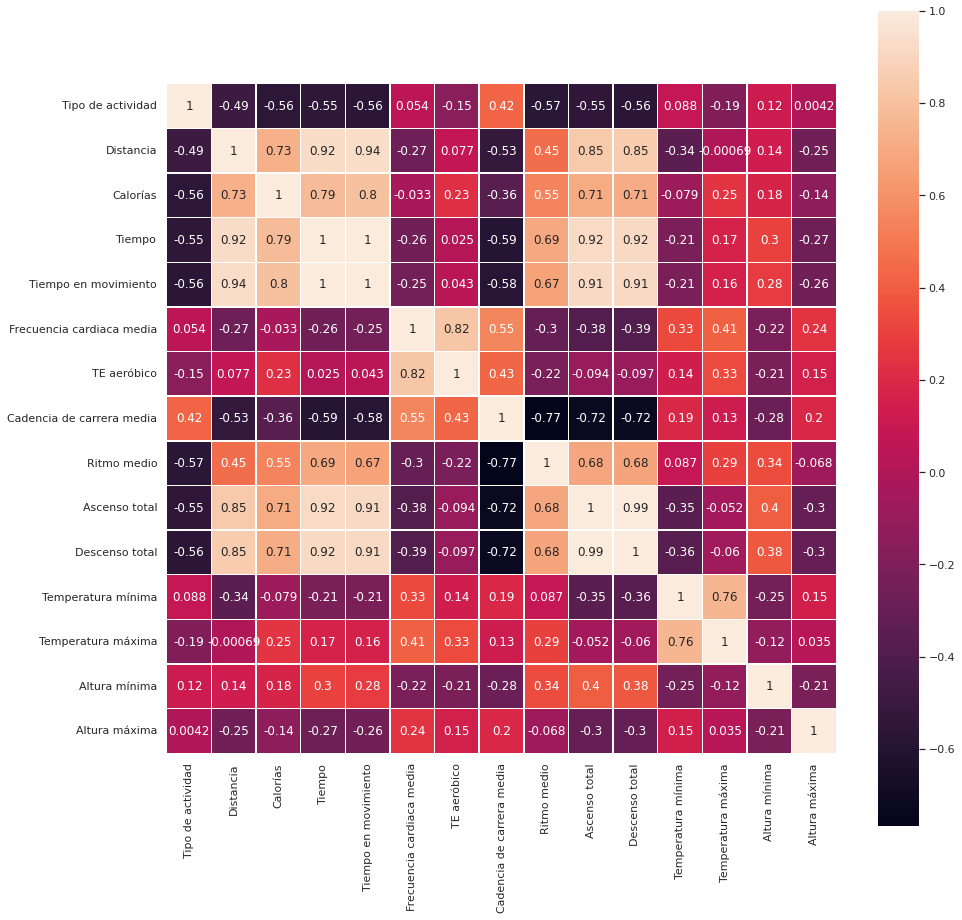

In [19]:
# Se utiliza la librería Seaborn descargada más arriba
sns.set()
fig, ax = plt.subplots(figsize=(15,15))  # Manipular el tamaño del Mapa
sns.heatmap(datos.corr(), square=True, annot=True, linewidths=.5, ax=ax)

***COMPARATIVA POR PARES DE DATOS***

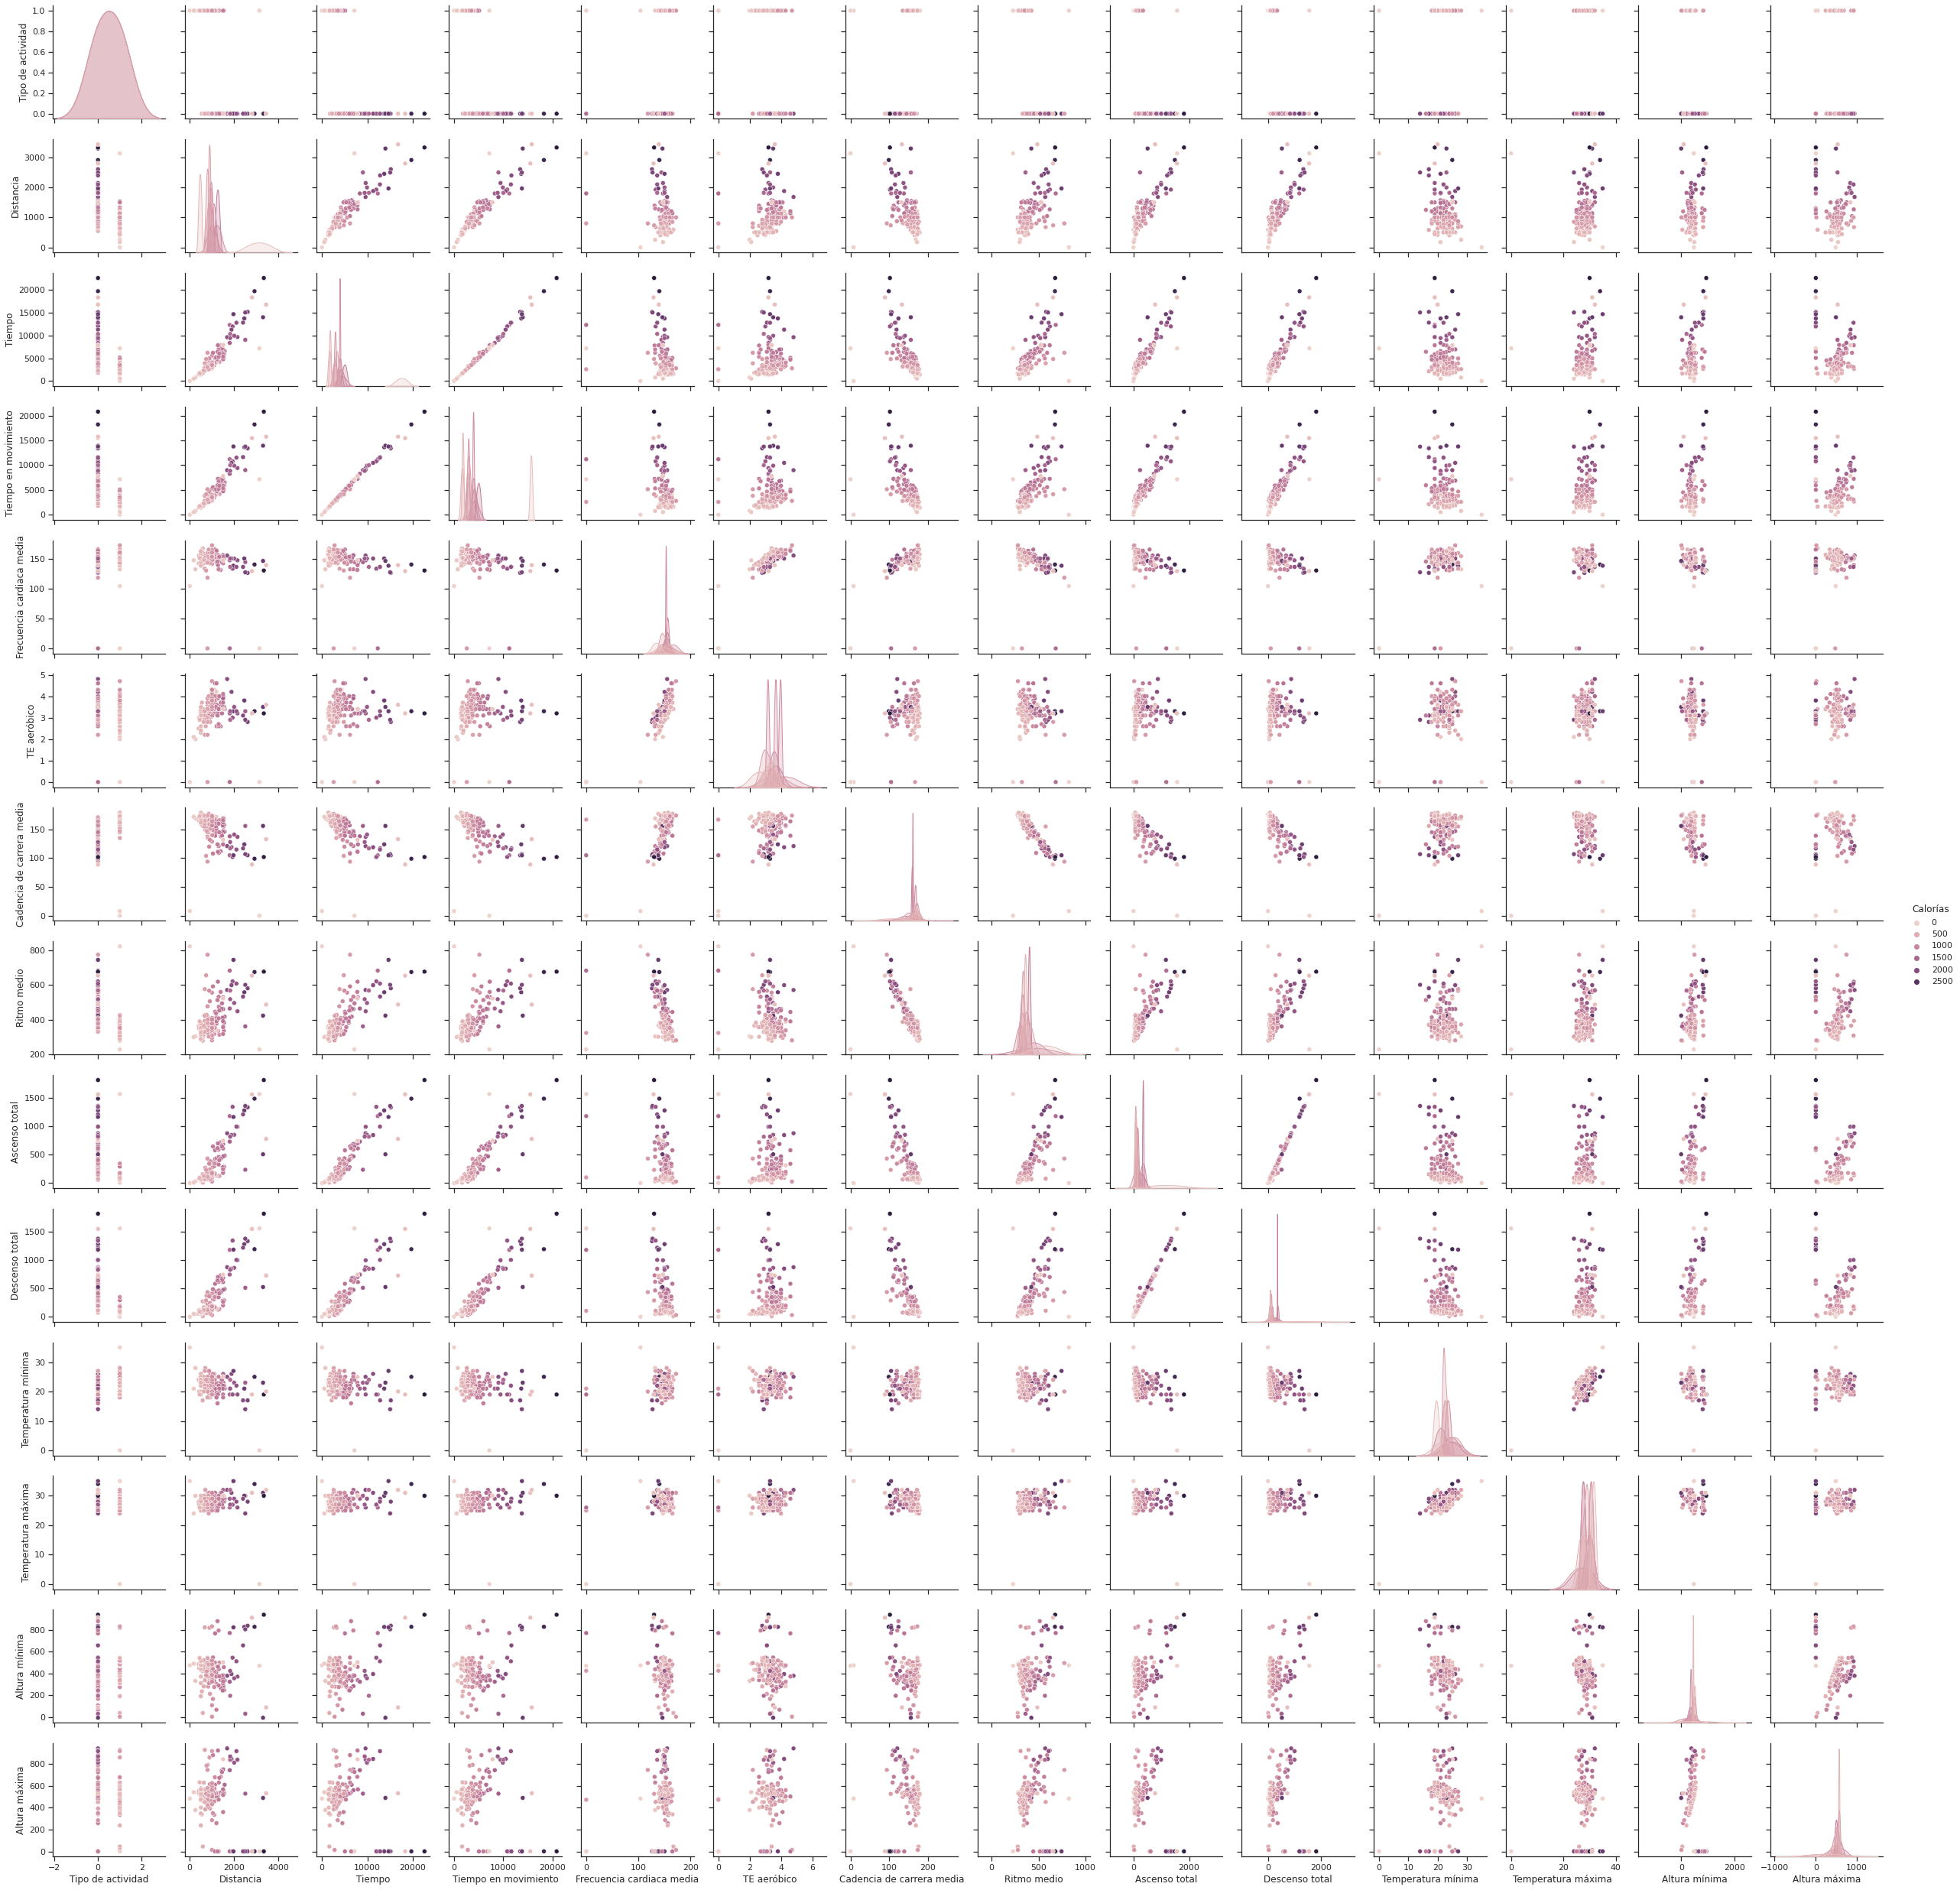

In [20]:
# Usamos las librerías seaborn y matpplotlib que ya descargamos anteriormente 
sns.set(style="ticks", color_codes=True)
sns.pairplot(datos, hue='Calorías')
plt.show()

***Los datos no requieren necesariamente de un escalamiento al ser claramente comprensibles por sí mismos. Por lo que se continuará de tal forma.***

# ***Selección de Modelo de Entrenamiento***

***Realizamos la separación de nuestros datos y escogemos nuestro target.***

In [26]:
# Separamos datos de entrada y salida
x_data = datos.drop('Calorías', axis=1)
y_data = datos['Calorías']

# Separamos en Train y Test los datos en un porcentaje del 25% para los tipo Test
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x_data, y_data, test_size=0.2)

***Comprobamos los resultados del modelo KNN***

· Usando Cross Validation

· Verificando previamente que número de vecinos es el adecuado

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score # Esta librería nos permite realizar el Cross Validation de forma sencilla
scores = [] 

for K in range(50):
    K = K+1
    model = KNeighborsRegressor(K)
    model.fit(xTrain, yTrain)
    #Cross validation
    score = cross_val_score(model,xTrain, yTrain, cv=5)
    scores.append(np.mean(score))

print(f'N_vecinos {scores.index(max(scores))+1} => Precisión Max: {max(scores)}')
print(f'Precisión Media: {np.mean(scores)}')

N_vecinos 10 => Precisión Max: 0.6692549219009061
Precisión Media: 0.556256602211866


# ***Entrenamiento del modelo y revisión de los resultados***

In [32]:
from sklearn.metrics import r2_score

# Escogemos modelo
model = KNeighborsRegressor(6)

# Entrenamos el modelo
model.fit(xTrain, yTrain)

# Predicción con los datos de Tipo Test
yPred = model.predict(xTest)

# R2_Score (Coeficiente de Determinación) nos indica con que 
# porcentaje el modelo predeciría los datos no vistos, lo que
# nos sirve para evaluar que tan bien ha entrenado
precisión_r2 = r2_score(yTest, yPred)

print('Valor de R2:',precisión_r2)
print('-------------------------------------------------')
print('Resultado de las Predicciones >')
print(yPred)
print('Length:',len(yPred),'- dType:',yPred.dtype)
print('-------------------------------------------------')
print('Comparativa con los Test>')
print(yTest.array)

Valor de R2: 0.5487432068132434
-------------------------------------------------
Resultado de las Predicciones >
[ 350.66666667 1393.5        1958.5        1393.5        1337.
  668.5         406.         1758.         1050.16666667 1312.66666667
 1139.83333333  752.5         397.          650.33333333  859.83333333
  681.33333333  749.83333333 1958.5         316.5        1092.83333333
 1449.16666667 1126.83333333  891.16666667 1126.83333333 1113.16666667
  316.5        1141.16666667  382.33333333  632.16666667  780.66666667
  955.83333333  722.66666667]
Length: 32 - dType: float64
-------------------------------------------------
Comparativa con los Test>
<PandasArray>
[ 324, 1632,  242, 1691, 1232,  673,  396, 1451,  899, 1563, 1159,  750,  386,
  627,  915,  655,  764, 2978,    1, 1007, 1953, 1299,  921, 1158,  716,  122,
 1053,  450,  616,  819, 1177,  758]
Length: 32, dtype: int64


Text(0, 0.5, 'Predicción de Calorías')

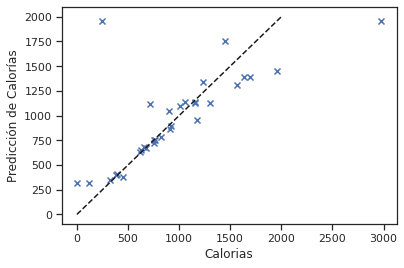

In [33]:
plt.scatter(yTest, yPred , alpha = 1, marker = 'x')
plt.plot([0, 2000], [0, 2000], "--k")
plt.axis("tight")
plt.xlabel("Calorias")
plt.ylabel("Predicción de Calorías")

# ***Importación y Exportación de Datos del Modelo***

In [34]:
# Si tenemos dificultades con la librería joblib la podemos importar
!pip install joblib
# Para exportar el modelo a un fichero
import sklearn.externals 
import joblib
joblib.dump(model,'Proyecto_Activities_entrenado.pkl')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['Proyecto_Activities_entrenado.pkl']

In [35]:
# Para importar el modelo entrenado y ejecutar de nuevo test
modelo_importado = KNeighborsRegressor(6)
modelo_entrenado = joblib.load('Proyecto_Activities_entrenado.pkl')
precisión_r2 = r2_score(yTest, yPred)
print("Valor de R2 del Modelo ",modelo_importado,"=",precisión_r2)

Valor de R2 del Modelo  KNeighborsRegressor(n_neighbors=6) = 0.5487432068132434


Text(0, 0.5, 'Predicción de Calorías')

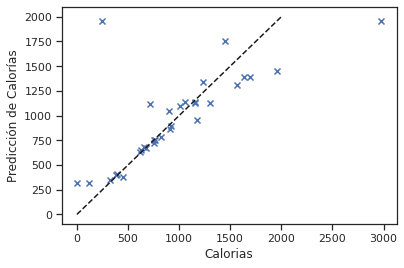

In [36]:
# Volvemos a realizar la validaión final y obtenenmos la matriz de confusión para ver que coincide con la anterior
yPred = modelo_entrenado.predict(xTest)
plt.scatter(yTest, yPred , alpha = 1, marker = 'x')
plt.plot([0, 2000], [0, 2000], "--k")
plt.axis("tight")
plt.xlabel("Calorias")
plt.ylabel("Predicción de Calorías")